In [1]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
train = pd.read_csv("C:/Users/Rohit/Downloads/Train_Big_Mart.csv")
test = pd.read_csv("C:/Users/Rohit/Downloads/Test_Big_Mart.csv")

In [3]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['LF','Low Fat'],'low fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg','Regular')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['LF','Low Fat'],'low fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg','Regular')

In [4]:
train['Item_Outlet_Age'] = 2013 - train['Outlet_Establishment_Year']
train.drop('Outlet_Establishment_Year', axis=1, inplace=True)
test['Item_Outlet_Age'] = 2013 - test['Outlet_Establishment_Year']
test.drop('Outlet_Establishment_Year', axis=1, inplace=True)


In [ ]:
train['Item_Weight'] = train['Item_Weight'].fillna(0)
test['Item_Weight'] = test['Item_Weight'].fillna(0)
s=''
value=0
for i in range(train['Item_Type'].count()):
    if (train['Item_Weight'][i]==0):
        s = train['Item_Identifier'][i]
    for i in range(train['Item_Type'].count()):
        if (train['Item_Weight'][i]>0 and train['Item_Identifier'][i] ==s):
            value= train['Item_Weight'][i]
            break
    train['Item_Weight'][i]=value
s=''
value=0
for i in range(test['Item_Type'].count()):
    if (test['Item_Weight'][i]==0):
        s = test['Item_Identifier'][i]
    for i in range(test['Item_Type'].count()):
        if (test['Item_Weight'][i]>0 and test  ['Item_Identifier'][i] ==s):
            value= test['Item_Weight'][i]
            break
    train['Item_Weight'][i]=value

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [ ]:
# train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())
# test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [ ]:
train.drop('Item_Identifier',axis=1,inplace = True)
test.drop('Item_Identifier',axis=1,inplace = True)

In [209]:
train['Outlet_Size'] = train['Outlet_Size'].fillna('yolo')
test['Outlet_Size'] = test['Outlet_Size'].fillna('yolo')

In [210]:
X = pd.get_dummies(train)
test = pd.get_dummies(test)

In [212]:
X_train = X.drop("Item_Outlet_Sales",axis=1)
Y_train = X["Item_Outlet_Sales"]
X_test  = test#.drop("Loan_Status",axis=1).copy()

In [213]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)

In [214]:
#Linear Regression Model
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

In [215]:
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test,y_pred)
print ('R Square : ',regr.score(x_test, y_test))
print ('Adjusted R Square : ',1 - (1-regr.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)

('R Square : ', 0.54540632303069136)
('Adjusted R Square : ', 0.53363779316333426)
('MAE : ', 851.93210861810405)
('MSE : ', 1312748.6606581942)
('RMSE : ', 1145.7524430077356)


In [216]:
#Decision Tree
from sklearn import tree
model = tree.DecisionTreeRegressor() #for regression
fit_model = model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)

In [217]:
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
mae = mean_absolute_error(y_test,y_pred1)
print ('R Square : ',model.score(x_test, y_test))
print ('Adjusted R Square : ',1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)

('R Square : ', 0.17572220971828123)
('Adjusted R Square : ', 0.1543832904033422)
('MAE : ', 1071.1253725513195)
('MSE : ', 2380300.5189526137)
('RMSE : ', 1542.8222577317886)


In [218]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=5) # default value for n_neighbors is 5
model.fit(x_train, y_train)
y_pred2 = model.predict(x_test)

In [219]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
mae = mean_absolute_error(y_test,y_pred2)
print ('R Square : ',model.score(x_test, y_test))
print ('Adjusted R Square : ',1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)

('R Square : ', 0.46263321159548965)
('Adjusted R Square : ', 0.44872184982463237)
('MAE : ', 888.70281102639296)
('MSE : ', 1551775.9429985259)
('RMSE : ', 1245.7029914865445)


In [220]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
model= RandomForestRegressor()
# Train the model using the training sets and check score
model.fit(x_train, y_train)
#Predict Output
y_pred3= model.predict(x_test)

In [221]:
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
mae = mean_absolute_error(y_test,y_pred3)
print ('R Square : ',model.score(x_test, y_test))
print ('Adjusted R Square : ',1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)

('R Square : ', 0.49717820049579675)
('Adjusted R Square : ', 0.48416114006311717)
('MAE : ', 843.70207239882689)
('MSE : ', 1452018.9727439836)
('RMSE : ', 1204.9974990612984)


In [222]:
from sklearn.cluster import KMeans
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(X_train).score(X_train) for i in range(len(km))]

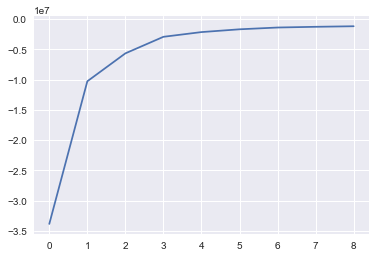

In [223]:
plt.plot(score)
plt.show()

In [224]:
score

[-33834977.651432335,
 -10283681.932491349,
 -5675140.8693167595,
 -2943036.4513565567,
 -2164443.6380237024,
 -1704492.4174165202,
 -1409872.7277420878,
 -1291359.4126713674,
 -1199939.8552156882]